In [614]:
import matplotlib
import matplotlib.pyplot as mp
import cartopy
import numpy
import netCDF4
import matplotlib.patches
import itertools

% matplotlib inline

_DEGREE_SYMBOL = u'\u00B0'

In [104]:
def _lon_hemisphere_E(longitude):
    """Return the hemisphere (E, W or '' for 0) for the given longitude."""
    #longitude = _fix_lons(longitude)
    #if longitude > 0:
    #    hemisphere = 'E'
    #elif longitude < 0:
    #    hemisphere = 'E'
    #else:
    #    hemisphere = ''
    hemisphere='E'
    return hemisphere,longitude+180.
def _east_formatted(longitude, num_format='g'):
    fmt_string = u'{longitude:{num_format}}{degree}{hemisphere}'
    return fmt_string.format(longitude=_lon_hemisphere_E(longitude)[1], num_format=num_format,hemisphere=_lon_hemisphere_E(longitude)[0],degree=_DEGREE_SYMBOL)

LONGITUDE_FORMATTER_EAST = matplotlib.ticker.FuncFormatter(lambda v, pos:_east_formatted(v))

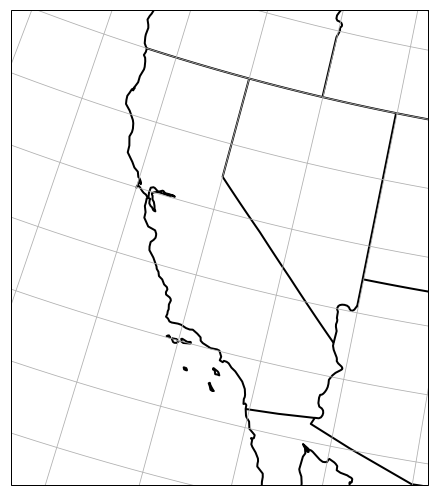

In [13]:
fontsize = 18
fig = mp.figure(figsize=(7,7))

projection_crs = cartopy.crs.LambertConformal()

ax = fig.add_subplot(111, projection=projection_crs)#projection=cartopy.crs.PlateCarree(central_longitude=180))
ax.set_extent([235,247,31,43])

ax.coastlines(resolution='50m', lw=2)
ax.add_feature(cartopy.feature.BORDERS, lw=2)

#longitude_lines = numpy.arange(225,276,25)-180.
#latitude_lines = numpy.arange(-90,91,30)

#gridlines = ax.gridlines(crs=cartopy.crs.PlateCarree(central_longitude=180), color='0', linestyle=':')


states_provinces = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='None')

ax.gridlines()
# counties = cartopy.feature.NaturalEarthFeature(
#     category='cultural',
#     name='admin_0_boundary_lines',
#     scale='50m',
#     facecolor='None')

ax.add_feature(states_provinces, edgecolor='0', lw=2)
#ax.add_feature(counties, edgecolor='0', lw=2)

ax.axis('off')
fig.tight_layout()

In [14]:
#kw = dict(resolution='10m', category='cultural', name='admin_1_states_provinces')
states_shapes = cartopy.io.shapereader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces')
shapes_reader = cartopy.io.shapereader.Reader(states_shapes)

In [15]:
states_name_list = numpy.array(([i.attributes['name'] for i in shapes_reader.records()]))
for i in shapes_reader.records():
    if i.attributes['name']=='California' and i.attributes['iso_a2']=='US':
        CA_object = i
CA_object_no_islands = CA_object.geometry.geoms[-1] # get the last one (the state of Cali)

# Parks and protected lands

In [22]:
lon_lo, lon_hi, lat_lo, lat_hi = 235.25, 246.25, 32., 42.5

if lon_lo>180:
    lon_lo = -(360-lon_lo)
if lon_hi>180:
    lon_hi = -(360-lon_hi)

In [329]:
# parks_area_feature = cartopy.feature.NaturalEarthFeature(
#         category='cultural',
#         name='parks_and_protected_lands_area',
#         scale='10m')

# parks_point_feature = cartopy.feature.NaturalEarthFeature(
#         category='cultural',
#         name='parks_and_protected_lands_point',
#         scale='10m')

# parks_line_feature = cartopy.feature.NaturalEarthFeature(
#         category='cultural',
#         name='parks_and_protected_lands_line',
#         scale='10m')

parks_area = cartopy.io.shapereader.natural_earth(resolution='10m', category='cultural', name='parks_and_protected_lands_area')
parks_area_reader = cartopy.io.shapereader.Reader(parks_area)
parks_area_list = list(parks_area_reader.geometries())

parks_point = cartopy.io.shapereader.natural_earth(resolution='10m', category='cultural', name='parks_and_protected_lands_point')
parks_point_reader = cartopy.io.shapereader.Reader(parks_point)
parks_point_list = list(parks_point_reader.geometries())

parks_line = cartopy.io.shapereader.natural_earth(resolution='10m', category='cultural', name='parks_and_protected_lands_line')
parks_line_reader = cartopy.io.shapereader.Reader(parks_line)
parks_line_list = list(parks_line_reader.geometries())
parks_line_records_list = list(parks_line_reader.records())

# place these shapefiles in the correct place:
# /Users/baird/.local/share/cartopy/shapefiles/natural_earth/cultural

In [460]:
cal_parks_boundaries_reader = cartopy.io.shapereader.Reader('/Users/baird/.local/share/cartopy/shapefiles/CalParksBoundaries/CalParksBoundaries2011.shp')
cal_parks_boundaries_list = list(cal_parks_boundaries_reader.geometries())

In [478]:
# try to transform using pyproj
# https://gis.stackexchange.com/questions/78838/converting-projected-coordinates-to-lat-lon-using-python

#from pyproj import Proj, transform
import pyproj

inProj = pyproj.Proj(init='epsg:3310')
outProj = pyproj.Proj(init='epsg:4326')
x1,y1 = -11705274.6374,4826473.6922
x2,y2 = pyproj.transform(inProj,outProj,x1,y1)
print(x2,y2)

118.51916130409576 1.0434665578813038


In [528]:
regions = [i.attributes['nps_region'] for i in parks_area_reader.records()]
names = [i.attributes['name'] for i in parks_area_reader.records()]

parks_area_pwest_list = []
for i in parks_area_reader.records():
    if i.attributes['nps_region']=='Pacific West':
        parks_area_pwest_list.append(i)

In [542]:
#a = [1]
#sorted(a.__dir__())
#range(a.__len__())

In [543]:
#cal_parks_boundaries_list[0].geoms[0].exterior.coords.xy
#cal_parks_boundaries_list[0].geoms[0].interiors.__dir__()
#sorted(cal_parks_boundaries_list[0].geoms[0].__dir__())

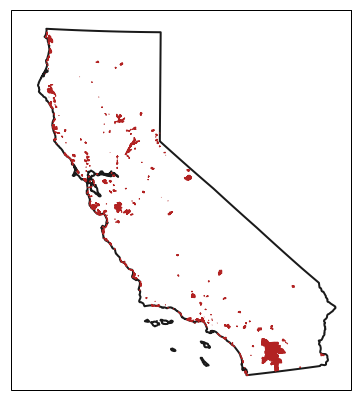

In [524]:
fontsize = 18
fig = mp.figure(figsize=(7,7))

#projection_crs = cartopy.crs.LambertConformal()
projection_crs = cartopy.crs.LambertConformal(standard_parallels=[lat_lo,lat_hi], central_longitude=0.5*(lon_lo+lon_hi), central_latitude=0.5*(lat_lo+lat_hi))

ax = fig.add_subplot(111, projection=projection_crs)
ax.set_extent([lon_lo, lon_hi, lat_lo, lat_hi])

# DRAW CALIFORNIA
kw = {'facecolor':'None', 'edgecolor':'0.1', 'linewidth':2}
ax.add_geometries(CA_object.geometry, crs=cartopy.crs.PlateCarree(), **kw)
state_paths = cartopy.mpl.patch.geos_to_path(CA_object.geometry)

inProj = pyproj.Proj(init='epsg:3310')
outProj = pyproj.Proj(init='epsg:4326')
kw = {'facecolor':'firebrick', 'edgecolor':'firebrick', 'linewidth':1}
for park in range(len(cal_parks_boundaries_list)):
    for geom in cal_parks_boundaries_list[park].geoms:
        xvals=geom.exterior.coords.xy[0]
        yvals=geom.exterior.coords.xy[1]
        xvals,yvals=pyproj.transform(inProj,outProj,xvals,yvals)
        #ax.scatter(xvals,yvals,transform=cartopy.crs.PlateCarree())
        ax.add_geometries([shapely.geometry.Polygon(zip(xvals,yvals))], crs=cartopy.crs.PlateCarree(), **kw)

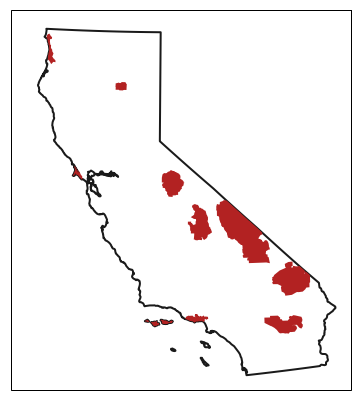

In [636]:
fontsize = 18
fig = mp.figure(figsize=(7,7))

#projection_crs = cartopy.crs.LambertConformal()
projection_crs = cartopy.crs.LambertConformal(standard_parallels=[lat_lo,lat_hi], central_longitude=0.5*(lon_lo+lon_hi), central_latitude=0.5*(lat_lo+lat_hi))

ax = fig.add_subplot(111, projection=projection_crs)
ax.set_extent([lon_lo, lon_hi, lat_lo, lat_hi])
#ax.set_extent([lon_lo-20, lon_hi+20, lat_lo-10, lat_hi+10])

# DRAW CALIFORNIA
kw = {'facecolor':'None', 'edgecolor':'0.1', 'linewidth':2}
ax.add_geometries(CA_object.geometry, crs=cartopy.crs.PlateCarree(), **kw)
state_paths = cartopy.mpl.patch.geos_to_path(CA_object.geometry)

# DRAW AREAS OF PROTECTED LANDS
kw = {'facecolor':'firebrick', 'edgecolor':'firebrick', 'linewidth':2, 'zorder':2}
parks_area_plot_list = []
for path in state_paths:
    for area in parks_area_pwest_list:
        for geom in area.geometry.geoms:
            xy = numpy.column_stack((geom.exterior.coords.xy[0], \
                                     geom.exterior.coords.xy[1]))
            plot = ax.add_patch(matplotlib.patches.Polygon(xy, transform=cartopy.crs.PlateCarree(), **kw))
            plot.set_clip_path(path, transform=cartopy.crs.PlateCarree()._as_mpl_transform(ax))

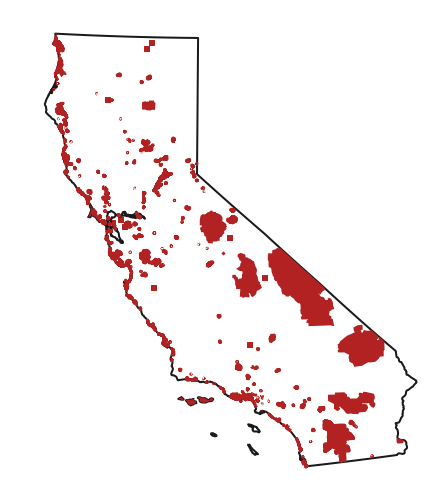

In [640]:
fontsize = 18
fig = mp.figure(figsize=(7,7))

#projection_crs = cartopy.crs.LambertConformal()
projection_crs = cartopy.crs.LambertConformal(standard_parallels=[lat_lo,lat_hi], central_longitude=0.5*(lon_lo+lon_hi), central_latitude=0.5*(lat_lo+lat_hi))

ax = fig.add_subplot(111, projection=projection_crs)
ax.set_extent([lon_lo, lon_hi, lat_lo, lat_hi])
#ax.set_extent([lon_lo-20, lon_hi+20, lat_lo-10, lat_hi+10])

# DRAW CALIFORNIA
kw = {'facecolor':'None', 'edgecolor':'0.1', 'linewidth':2}
ax.add_geometries(CA_object.geometry, crs=cartopy.crs.PlateCarree(), **kw)
state_paths = cartopy.mpl.patch.geos_to_path(CA_object.geometry)

# DRAW AREAS OF PROTECTED LANDS
kw = {'facecolor':'firebrick', 'edgecolor':'firebrick', 'linewidth':2, 'zorder':2}
parks_area_plot_list = []
for path in state_paths:
    for area in parks_area_pwest_list:
        for geom in area.geometry.geoms:
            xy = numpy.column_stack((geom.exterior.coords.xy[0], \
                                     geom.exterior.coords.xy[1]))
            plot = ax.add_patch(matplotlib.patches.Polygon(xy, transform=cartopy.crs.PlateCarree(), **kw))
            plot.set_clip_path(path, transform=cartopy.crs.PlateCarree()._as_mpl_transform(ax))

# DRAW POINTS OF PROTECTED LANDS
kw = {'s':25, 'c':'firebrick', 'edgecolors':'firebrick', 'linewidth':1, 'marker':'s'}
point_plots = ax.scatter([point.x for point in parks_point_list], [point.y for point in parks_point_list], transform=cartopy.crs.PlateCarree(), **kw)
for i in state_paths:
    point_plots.set_clip_path(i, transform=cartopy.crs.PlateCarree()._as_mpl_transform(ax))

# DRAW ALL STATE PARKS FROM CONFUSING FILE
inProj = pyproj.Proj(init='epsg:3310')
outProj = pyproj.Proj(init='epsg:4326')
kw = {'facecolor':'firebrick', 'edgecolor':'firebrick', 'linewidth':3}
for park in range(len(cal_parks_boundaries_list)):
    for geom in cal_parks_boundaries_list[park].geoms:
        xvals=geom.exterior.coords.xy[0]
        yvals=geom.exterior.coords.xy[1]
        xvals,yvals=pyproj.transform(inProj,outProj,xvals,yvals)
        ax.add_geometries([shapely.geometry.Polygon(zip(xvals,yvals))], crs=cartopy.crs.PlateCarree(), **kw)

# DRAW LINES OF PROTECTED LANDS
kw = {'color':'firebrick', 'lw':3}
for i in range(len(parks_line_list)):
    for geom in parks_line_list[i].geoms:
        mp.plot(geom.coords.xy[0], geom.coords.xy[1], **kw)

ax.outline_patch.set_visible(False)
ax.background_patch.set_visible(False)

fig.tight_layout()
mp.savefig('CA_parks.png', bbox_inches='tight', transparent=True, dpi=600)

# Adding in topography

In [201]:
# topographic data
filename = '/Users/baird/Dropbox/_group_conferences/2017/agu_2017/upgoer_5/code_for_plots/noaa_topo_data/ETOPO1_Ice_g_gmt4.grd'

ncfile = netCDF4.Dataset(filename, 'r', 'NetCDF4')
topo_data = ncfile.variables['z'][:]
topo_lat = ncfile.variables['y'][:]
topo_lon = ncfile.variables['x'][:]

In [202]:
lon_lo, lon_hi, lat_lo, lat_hi = 235.25, 246.25, 32., 42.5

if lon_lo>180:
    lon_lo = -(360-lon_lo)
if lon_hi>180:
    lon_hi = -(360-lon_hi)

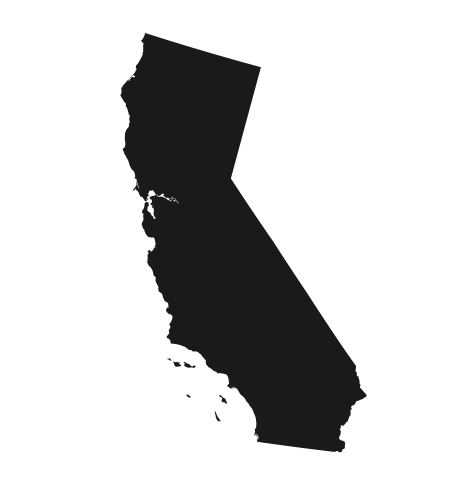

In [203]:
fontsize = 18
fig = mp.figure(figsize=(7,7))

projection_crs = cartopy.crs.LambertConformal()

ax = fig.add_subplot(111, projection=projection_crs)
ax.set_extent([lon_lo, lon_hi, lat_lo, lat_hi])

kw = {'facecolor':'0.1'}
ax.add_geometries(CA_object.geometry, crs=cartopy.crs.PlateCarree(), **kw)

#ax.spines['left'].set_linewidth(0)

#ax.outline_patch.set_edgecolor('None')
ax.outline_patch.set_visible(False)
ax.background_patch.set_visible(False)

fig.tight_layout()
mp.savefig('CA_black.png', bbox_inches='tight', transparent=True, dpi=300)

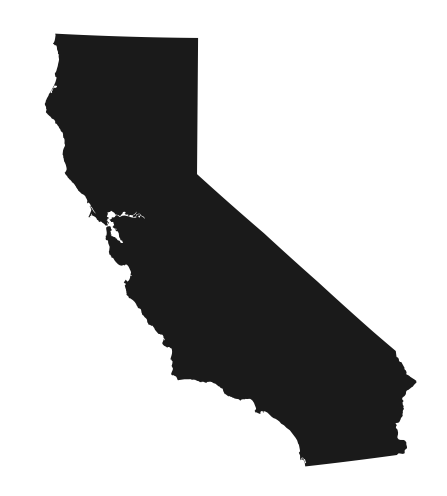

In [204]:
fontsize = 18
fig = mp.figure(figsize=(7,7))

#projection_crs = cartopy.crs.LambertConformal()
projection_crs = cartopy.crs.LambertConformal(standard_parallels=[lat_lo,lat_hi], central_longitude=0.5*(lon_lo+lon_hi), central_latitude=0.5*(lat_lo+lat_hi))

ax = fig.add_subplot(111, projection=projection_crs)
ax.set_extent([lon_lo, lon_hi, lat_lo, lat_hi])

kw = {'facecolor':'0.1'}
ax.add_geometries([CA_object_no_islands], crs=cartopy.crs.PlateCarree(), **kw)

#ax.spines['left'].set_linewidth(0)

#ax.outline_patch.set_edgecolor('None')
ax.outline_patch.set_visible(False)
ax.background_patch.set_visible(False)

fig.tight_layout()
mp.savefig('CA_black_no_islands.png', bbox_inches='tight', transparent=True, dpi=300)

In [205]:
lon_indices = (topo_lon>(lon_lo-0.5))&(topo_lon<(lon_hi+0.5))
lat_indices = (topo_lat>(lat_lo-0.5))&(topo_lat<(lat_hi+0.5))

topo_lon_subset = topo_lon[lon_indices]
topo_lat_subset = topo_lat[lat_indices]
topo_data_subset = topo_data[lat_indices,:]
topo_data_subset = topo_data_subset[:,lon_indices]

In [206]:
# make color map
minval=0.3 # for inferno:  0.18
maxval=1 # for inferno: 1.0
n=256
full_cmap = mp.get_cmap('gist_ncar')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))

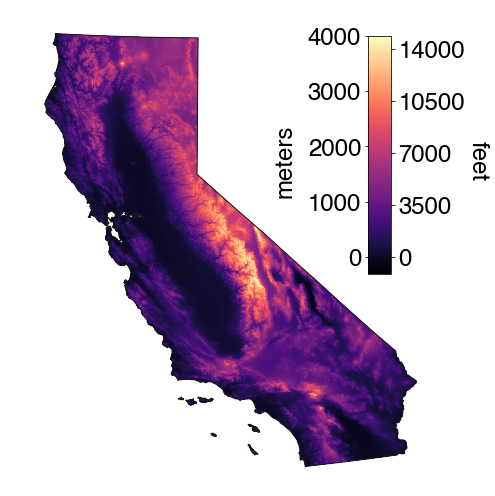

In [208]:
fontsize = 24
fig = mp.figure(figsize=(8,7))
vmin, vmax = -300., 4000.
levels = numpy.arange(vmin,vmax,100)
projection_crs = cartopy.crs.LambertConformal(standard_parallels=[lat_lo,lat_hi], central_longitude=0.5*(lon_lo+lon_hi), central_latitude=0.5*(lat_lo+lat_hi))
#projection_crs = cartopy.crs.LambertConformal()
#projection_crs = cartopy.crs.Miller()
#projection_crs = cartopy.crs.Mollweide()
#projection_crs = cartopy.crs.LambertCylindrical()
#projection_crs = cartopy.crs.PlateCarree()

ax = fig.add_subplot(111, projection=projection_crs)
ax.set_extent([lon_lo, lon_hi, lat_lo, lat_hi])#, crs=cartopy.crs.LambertConformal())

kw = {'facecolor':'None', 'lw':1, 'edgecolor':'0.1'}
state_outline = ax.add_geometries(CA_object.geometry, crs=cartopy.crs.PlateCarree(), **kw)

state_paths = cartopy.mpl.patch.geos_to_path(CA_object.geometry)

for i in range(len(state_paths)):
    topo_image = ax.pcolormesh(topo_lon_subset, topo_lat_subset, topo_data_subset, vmin=vmin, vmax=vmax, cmap='magma', transform=cartopy.crs.PlateCarree())
    #topo_image = ax.contourf(topo_lon_subset, topo_lat_subset, topo_data_subset, levels=levels, extend='both', cmap='magma', transform=cartopy.crs.PlateCarree())
    topo_image.set_clip_path(state_paths[i], transform=cartopy.crs.PlateCarree()._as_mpl_transform(ax))

fig.tight_layout()

ax_pos = ax.get_position()
cbar_axes = fig.add_axes([ax_pos.x1-0.23, ax_pos.y0+0.42, 0.04, ax_pos.height/2])
cbar1 = mp.colorbar(topo_image, cax=cbar_axes, orientation='vertical')
cbar_axes.tick_params(labelsize=fontsize)
cbar_axes.yaxis.set_ticks_position('left')
cbar1.set_ticks([0,1000,2000,3000,4000])

cbar2 = cbar1.ax.twinx()
levels2 = numpy.array((vmin,vmax))*100/(12*2.24)
cbar2.set_ylim(levels2.min(), levels2.max())
cbar2.tick_params(labelsize=fontsize)
cbar2.set_yticks(numpy.arange(0,14001,3500))

cbar2.spines['right'].set_visible(False)
cbar2.spines['left'].set_visible(False)
cbar2.spines['top'].set_visible(False)
cbar2.spines['bottom'].set_visible(False)

cbar_pos = cbar_axes.get_position()
ax.text(s='meters', x=cbar_pos.x0+0.5*cbar_pos.width-0.1, \
        y=cbar_pos.y0+cbar_pos.height/2, transform=ax.transAxes, \
        ha='right', va='center', \
        fontsize=fontsize, rotation=90)
ax.text(s='feet', x=cbar_pos.x0+0.5*cbar_pos.width+0.3, \
        y=cbar_pos.y0+cbar_pos.height/2, transform=ax.transAxes, \
        ha='left', va='center', \
        fontsize=fontsize, rotation=-90)

ax.outline_patch.set_visible(False)
ax.background_patch.set_visible(False)

mp.savefig('CA_topography_lambert_conformal.png', bbox_inches='tight', transparent=True, dpi=600)

In [567]:
topo_image

# No colorbar

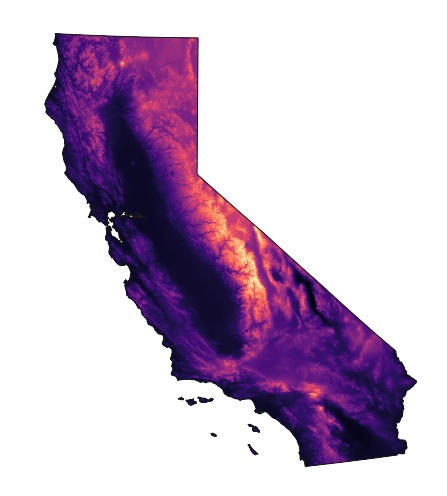

In [13]:
fontsize = 18
fig = mp.figure(figsize=(8,7))
vmin, vmax = -300., 4000.
levels = numpy.arange(vmin,vmax,100)
projection_crs = cartopy.crs.LambertConformal(standard_parallels=[lat_lo,lat_hi], central_longitude=0.5*(lon_lo+lon_hi), central_latitude=0.5*(lat_lo+lat_hi))
#projection_crs = cartopy.crs.LambertConformal()
#projection_crs = cartopy.crs.Miller()
#projection_crs = cartopy.crs.Mollweide()
#projection_crs = cartopy.crs.LambertCylindrical()
#projection_crs = cartopy.crs.PlateCarree()

ax = fig.add_subplot(111, projection=projection_crs)
ax.set_extent([lon_lo, lon_hi, lat_lo, lat_hi])#, crs=cartopy.crs.LambertConformal())

kw = {'facecolor':'None', 'lw':1, 'edgecolor':'0.1'}
state_outline = ax.add_geometries(CA_object.geometry, crs=cartopy.crs.PlateCarree(), **kw)

state_paths = cartopy.mpl.patch.geos_to_path(CA_object.geometry)


for i in range(len(state_paths)):
    topo_image = ax.pcolormesh(topo_lon_subset, topo_lat_subset, topo_data_subset, vmin=vmin, vmax=vmax, cmap='magma', transform=cartopy.crs.PlateCarree())
    #topo_image = ax.contourf(topo_lon_subset, topo_lat_subset, topo_data_subset, levels=levels, extend='both', cmap='magma', transform=cartopy.crs.PlateCarree())
    topo_image.set_clip_path(state_paths[i], transform=cartopy.crs.PlateCarree()._as_mpl_transform(ax))

fig.tight_layout()
"""
ax_pos = ax.get_position()
cbar_axes = fig.add_axes([ax_pos.x1-0.23, ax_pos.y0+0.42, 0.04, ax_pos.height/2])
cbar1 = mp.colorbar(topo_image, cax=cbar_axes, orientation='vertical')
cbar_axes.tick_params(labelsize=fontsize)
cbar_axes.yaxis.set_ticks_position('left')

cbar2 = cbar1.ax.twinx()
levels2 = numpy.array((vmin,vmax))*100/(12*2.24)
cbar2.set_ylim(levels2.min(), levels2.max())
cbar2.tick_params(labelsize=fontsize)
cbar2.set_yticks(numpy.arange(0,14001,2000))

cbar2.spines['right'].set_visible(False)
cbar2.spines['left'].set_visible(False)
cbar2.spines['top'].set_visible(False)
cbar2.spines['bottom'].set_visible(False)

cbar_pos = cbar_axes.get_position()
ax.text(s='meters', x=cbar_pos.x0+0.5*cbar_pos.width-0.08, \
        y=cbar_pos.y0+cbar_pos.height/2, transform=ax.transAxes, \
        ha='right', va='center', \
        fontsize=fontsize, rotation=90)
ax.text(s='feet', x=cbar_pos.x0+0.5*cbar_pos.width+0.25, \
        y=cbar_pos.y0+cbar_pos.height/2, transform=ax.transAxes, \
        ha='left', va='center', \
        fontsize=fontsize, rotation=-90)
"""
ax.outline_patch.set_visible(False)
ax.background_patch.set_visible(False)

mp.savefig('CA_topography_lambert_conformal_no_cbar.png', bbox_inches='tight', transparent=True, dpi=600)

# No colorbar

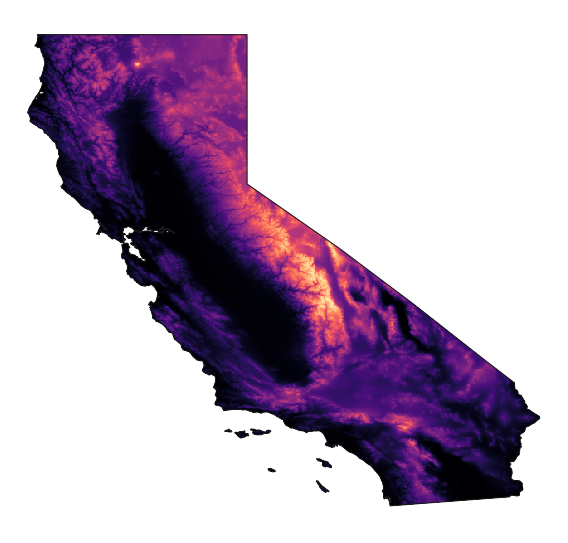

In [228]:
fontsize = 18
fig = mp.figure(figsize=(8,8))
vmin, vmax = 0., 4000.

ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree(central_longitude=180))
ax.set_extent([lon_lo, lon_hi, lat_lo, lat_hi])

kw = {'facecolor':'None', 'lw':1, 'edgecolor':'0.1'}
state_outline = ax.add_geometries(CA_object.geometry, cartopy.crs.PlateCarree(), **kw)

state_paths = cartopy.mpl.patch.geos_to_path(CA_object.geometry)

plate_carree_transform = cartopy.crs.PlateCarree()._as_mpl_transform(ax)
for i in range(len(state_paths)):
   topo_image = ax.pcolormesh(topo_lon_subset, topo_lat_subset, topo_data_subset, vmin=vmin, vmax=vmax, cmap='magma', transform=cartopy.crs.PlateCarree())
   topo_image.set_clip_path(state_paths[i], transform=plate_carree_transform)

fig.tight_layout()

# ax_pos = ax.get_position()
# #cbar_axes = fig.add_axes([ax_pos.x1+0.01, ax_pos.y0, 0.04, ax_pos.height])
# cbar_axes = fig.add_axes([ax_pos.x1-0.23, ax_pos.y0+0.42, 0.04, ax_pos.height/2])
# cbar = mp.colorbar(topo_image, cax=cbar_axes, orientation='vertical')
# cbar_axes.tick_params(labelsize=fontsize)
# cbar_axes.yaxis.set_ticks_position('left')
# #cbar.set_label('elevation above\nsea level (m)', fontsize=fontsize, labelpad=-120)

# cbar_axes2 = cbar.ax.twinx()
# levels2 = numpy.array((vmin,vmax))*100/(12*2.24)
# cbar_axes2.set_ylim(levels2.min(), levels2.max())
# cbar_axes2.tick_params(labelsize=fontsize)
# cbar_axes2.set_yticks(numpy.arange(0,14001,2000))


# cbar_pos = cbar_axes.get_position()
# ax.text(s='meters', x=cbar_pos.x0+0.5*cbar_pos.width-0.1, y=cbar_pos.y0+cbar_pos.height/2, transform=ax.transAxes, ha='right', va='center', fontsize=fontsize, rotation=90)
# ax.text(s='feet', x=cbar_pos.x0+0.5*cbar_pos.width+0.21, y=cbar_pos.y0+cbar_pos.height/2, transform=ax.transAxes, ha='right', va='center', fontsize=fontsize, rotation=-90)
# #ax.text(s='elevation above\nsea level (m)', x=0.75, y=cbar_pos.y0+cbar_pos.height/2, transform=ax.transAxes, ha='right', va='center', fontsize=fontsize)

ax.outline_patch.set_visible(False)
ax.background_patch.set_visible(False)

mp.savefig('CA_topography_tight_no_cbar.png', bbox_inches='tight', transparent=True, dpi=300)

# Info for clip on stuff

http://scitools.org.uk/cartopy/docs/v0.13/examples/logo.html

https://matplotlib.org/devdocs/api/_as_gen/matplotlib.patches.PathPatch.html

In [77]:
state_outline_vars = [i for i in vars(state_outline)]
print(state_outline)
for i in state_outline_vars:  print(i)

_stale
stale_callback
_axes
figure
_transform
_transformSet
_visible
_animated
_alpha
clipbox
_clippath
_clipon
_label
_picker
_contains
_rasterized
_agg_filter
_mouseover
eventson
_oid
_propobservers
_remove_method
_url
_gid
_snap
_sketch
_path_effects
_sticky_edges
_kwargs
zorder
_feature


In [95]:
state_paths = cartopy.mpl.patch.geos_to_path(CA_object.geometry)

In [96]:
print(state_paths[0])

Path(array([[-118.59569063,   33.0352813 ],
       [-118.58985749,   33.02996712],
       [-118.57716484,   33.03245575],
       [-118.56436711,   33.02376211],
       [-118.56546546,   33.01840765],
       [-118.56018013,   33.0063307 ],
       [-118.5497873 ,   33.00157694],
       [-118.54504931,   32.98561293],
       [-118.51602298,   32.95816232],
       [-118.50442406,   32.94132922],
       [-118.4835626 ,   32.92159994],
       [-118.46673894,   32.91481985],
       [-118.4506616 ,   32.89762456],
       [-118.40710969,   32.86425786],
       [-118.38198356,   32.8476624 ],
       [-118.35876639,   32.8278285 ],
       [-118.35094154,   32.81867097],
       [-118.36359616,   32.81683991],
       [-118.3841807 ,   32.82439136],
       [-118.40148338,   32.81999014],
       [-118.40416419,   32.81240469],
       [-118.41136634,   32.80980052],
       [-118.42501109,   32.80241614],
       [-118.42904342,   32.80287277],
       [-118.43836739,   32.81692166],
       [-118.4499150

In [85]:
#print(state_outline_vars)
#print(state_outline.clipbox)
state_outline_axes_var = [i for i in vars(state_outline._axes)]
#for i in state_outline_axes_var:  print(i)
print(vars(state_outline))

print()
#print(state_outline._axes.outline_patch.get_path())
#print(state_outline._axes.patches[1].get_path())
#print(state_outline._axes._get_patches_for_fill())
#print(state_outline._axes._get_patches_for_fill())

{'_stale': True, 'stale_callback': <function _stale_axes_callback at 0x10a18bc80>, '_axes': <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x182e9f0048>, 'figure': <matplotlib.figure.Figure object at 0x182e9f0160>, '_transform': CompositeGenericTransform(TransformWrapper(BlendedAffine2D(IdentityTransform(),IdentityTransform())), CompositeGenericTransform(BboxTransformFrom(TransformedBbox(Bbox([[55.25000000000002, 32.0], [66.25, 42.5]]), TransformWrapper(BlendedAffine2D(IdentityTransform(),IdentityTransform())))), BboxTransformTo(TransformedBbox(Bbox([[0.06767526455026525, 0.028373015873015883], [0.9323247354497347, 0.9716269841269842]]), BboxTransformTo(TransformedBbox(Bbox([[0.0, 0.0], [8.0, 7.0]]), Affine2D(array([[ 72.,   0.,   0.],
       [  0.,  72.,   0.],
       [  0.,   0.,   1.]])))))))), '_transformSet': True, '_visible': True, '_animated': False, '_alpha': None, 'clipbox': TransformedBbox(Bbox([[0.0, 0.0], [1.0, 1.0]]), CompositeGenericTransform(CompositeGenericTransform(Bbox

In [33]:
print(CA_object.attributes)

{'adm1_code': 'USA-3521', 'diss_me': 3521, 'iso_3166_2': 'US-CA', 'wikipedia': 'http://en.wikipedia.org/wiki/California', 'iso_a2': 'US', 'adm0_sr': 8, 'name': 'California', 'name_alt': 'CA|Calif.', 'name_local': '', 'type': 'State', 'type_en': 'State', 'code_local': 'US06', 'code_hasc': 'US.CA', 'note': '', 'hasc_maybe': '', 'region': 'West', 'region_cod': '', 'provnum_ne': 0, 'gadm_level': 1, 'check_me': 20, 'scalerank': 2, 'datarank': 1, 'abbrev': 'Calif.', 'postal': 'CA', 'area_sqkm': 0.0, 'sameascity': -99, 'labelrank': 0, 'featurecla': 'Admin-1 scale rank', 'name_len': 10, 'mapcolor9': 1, 'mapcolor13': 1, 'fips': 'US06', 'fips_alt': '', 'woe_id': 2347563, 'woe_label': 'California, US, United States', 'woe_name': 'California', 'latitude': 36.7496, 'longitude': -119.591, 'sov_a3': 'US1', 'adm0_a3': 'USA', 'adm0_label': 2, 'admin': 'United States of America', 'geonunit': 'United States of America', 'gu_a3': 'USA', 'gn_id': 5332921, 'gn_name': 'California', 'gns_id': -1, 'gns_name': 

# Population centers

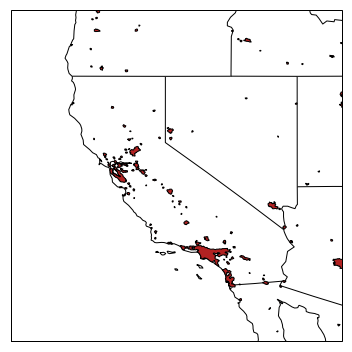

In [146]:
fontsize = 18
fig = mp.figure(figsize=(10,5))

#ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree(central_longitude=180))
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())

ax.set_extent([233,248,30,45])

ax.coastlines(resolution='50m')

#longitude_lines = numpy.arange(0,361,30)-180.
#longitude_lines = numpy.arange(225,276,25)-180.
#latitude_lines = numpy.arange(-90,91,30)

#gridlines = ax.gridlines(crs=cartopy.crs.PlateCarree(), color='0', linestyle=':')
ax.add_feature(cartopy.feature.BORDERS)

states_provinces = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='110m',
    facecolor='none')
urban_polygons = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    name='urban_areas',
    scale='10m',
    facecolor='firebrick')
# parks_protected_lands = cartopy.feature.NaturalEarthFeature(
#     category='cultural',
#     name='parks_and_protected_lands',
#     scale='10m',
#     facecolor='forestgreen')

ax.add_feature(states_provinces, edgecolor='0')
ax.add_feature(urban_polygons, edgecolor='0')
# ax.add_feature(parks_protected_lands, edgecolor='None')

fig.tight_layout()
